In [1]:
!ls ../data

Advertising.csv BrainCancer.csv Credit.csv      Income1.csv     Smarket.csv
Auto.csv        Caravan.csv     Default.csv     Income2.csv     Wage.csv
Auto.data       Carseats.csv    Fund.csv        OJ.csv          Weekly.csv
Bikeshare.csv   Ch12Ex13.csv    Heart.csv       Portfolio.csv
Boston.csv      College.csv     Hitters.csv     Publication.csv


## 1. Importing Packages

In [1]:
import numpy as np
import pandas as pd

### 1.1 New Imports

In [3]:
import statsmodels.api as sm

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [5]:
from statsmodels.stats.anova import anova_lm

### 1.2 Loading Data: Boston

In [36]:
Boston = pd.read_csv("../data/Boston.csv")                 

In [37]:
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [2]:
Boston = pd.read_csv("../data/Boston.csv",
                     index_col = 0)

In [3]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
Boston = Boston.reset_index(drop = True)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [43]:
Boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

In [44]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [45]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [46]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [47]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## 2. Simple Linear Regression

**Response Y**: `medv`

**Predictor X**: `lstat`

### 2.1 Using `statsmodels.api`

In [5]:
import statsmodels.api as sm

In [6]:
type(Boston["lstat"]), type(Boston[["lstat"]])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [7]:
X = Boston[["lstat"]]  # X is a dataframe
X = sm.add_constant(X)  # add in constant 1 column for intercept
X.head()

,const,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [8]:
y = Boston["medv"]  # y is a Series
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

#### 2.1.1 Fit the model:

In [9]:
model = sm.OLS(y, X)  #initialize the OLS model

results = model.fit()  # fit the model

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           5.08e-88
Time:                        21:30:37   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
results.params

const    34.553841
lstat    -0.950049
dtype: float64

#### 2.1.2 Making predictions:

In [63]:
newX = pd.DataFrame({"lstat":[5,10,15]})
newX = sm.add_constant(newX)
newX

,const,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [64]:
results.predict(newX)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [66]:
new_predictions = results.get_prediction(newX)

In [67]:
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [68]:
new_predictions.conf_int(alpha = 0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

#### 2.1.3 Making Plots

In [71]:
import matplotlib.pyplot as plt

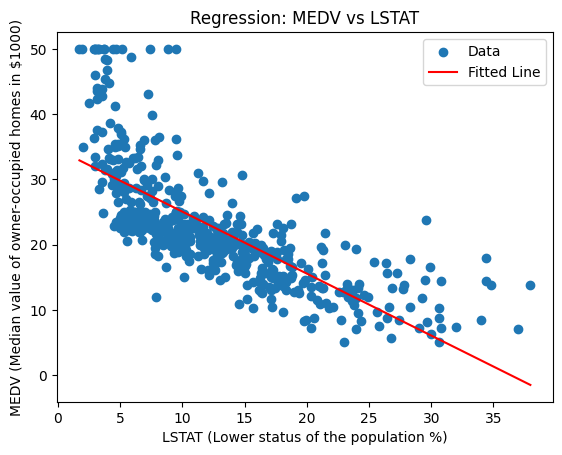

In [81]:
plt.scatter(X["lstat"], y, label="Data")

lstat_pred = np.linspace(X["lstat"].min(), X["lstat"].max(), 100)
X_pred = sm.add_constant(lstat_pred)
medv_pred = results.predict(X_pred)

plt.plot(lstat_pred, medv_pred, color="red", label="Fitted Line")

plt.xlabel('LSTAT (Lower status of the population %)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000)')
plt.title("Regression: MEDV vs LSTAT")
plt.legend()

plt.show()

In [82]:
plt.savefig("../figures/2_MEDV_vs_LSTAT")

<Figure size 640x480 with 0 Axes>

In [83]:
!ls ../figures

1_HorsePower_MilesPerGallon.jpg     1_horsepower_mpg.png
1_figure._2.pdf                     1_scatterplot_boxplot_histogram.pdf
1_figure_1.png                      2_MEDV_vs_LSTAT.png
1_figure_3.jpg


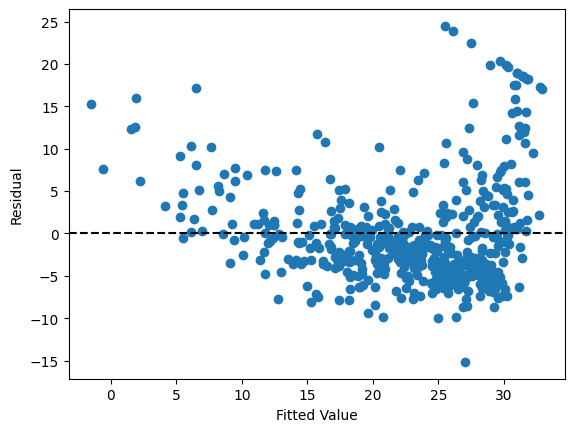

In [85]:
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(0, c="k", ls="--")

plt.xlabel("Fitted Value")
plt.ylabel("Residual")

plt.show()

#### 2.1.4 Leverage

In [89]:
influence = results.get_influence()

leverage = influence.hat_matrix_diag

studentized_residuals = influence.resid_studentized

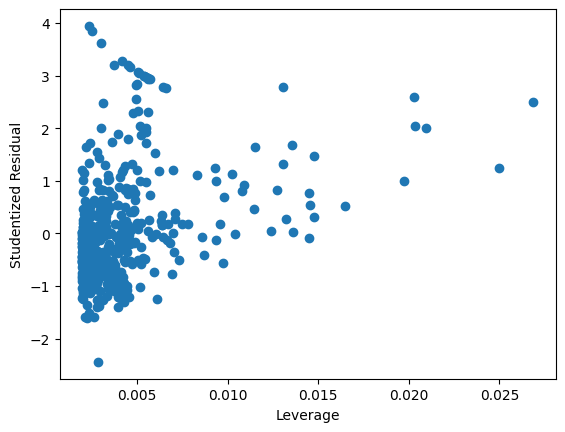

In [95]:
plt.scatter(leverage, studentized_residuals)

plt.xlabel("Leverage")
plt.ylabel("Studentized Residual")

plt.show()

In [92]:
leverage.max()

0.0268651665102835

### 2.2 Using Sci-Kit Learn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
X = Boston[["lstat"]]
y = Boston["medv"]

In [14]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [15]:
model.intercept_, model.coef_

(34.5538408793831, array([-0.95004935]))

In [16]:
newX = pd.DataFrame({"lstat":[5,10,15]})

new_pred = model.predict(newX)

In [17]:
new_pred

array([29.80359411, 25.05334734, 20.30310057])

## 3. Multiple Linear Regression

### 3.1 Data Pre-processing

In [21]:
import pandas as pd

In [19]:
Boston = pd.read_csv("../data/Boston.csv",
                     index_col = 0)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [20]:
Boston = Boston.reset_index(drop = True)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [22]:
import statsmodels.api as sm

In [24]:
X = Boston.drop(columns = ["medv"]) # X is a dataframe
X = sm.add_constant(X)
y = Boston["medv"]

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### 3.2 Fitting the Model

In [26]:
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          2.23e-133
Time:                        22:31:58   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.3 Checking the Collinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [33]:
X

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [37]:
X.shape

(506, 13)

In [32]:
VIF(X, 1)  # vif for the predictor crim

1.7674859154310125

In [41]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]

vif_df = pd.DataFrame({"vif": vals},
                       index = X.columns[1:])

vif_df

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


### 3.4 Interaction Terms

**Predictors**: `lstat`, `age` and `lstat`*`age`

In [57]:
X = Boston[["lstat", "age"]]

In [58]:
X.head()

,lstat,age
0,4.98,65.2
1,9.14,78.9
2,4.03,61.1
3,2.94,45.8
4,5.33,54.2


In [59]:
X.loc[:, "lstat_age"] = X["lstat"] * X["age"]

/var/folders/n_/r57knwmn2ndc9w5g7s814tf40000gn/T/ipykernel_21918/3993387501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "lstat_age"] = X["lstat"] * X["age"]


In [60]:
X.head()

,lstat,age,lstat_age
0,4.98,65.2,324.696
1,9.14,78.9,721.146
2,4.03,61.1,246.233
3,2.94,45.8,134.652
4,5.33,54.2,288.886


In [61]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
